In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Questão 1

In [21]:
df_1 = pd.read_csv("artificial1d.csv",names=['x', 'y'],header=0)

In [22]:
df_1

,x,y
0,-0.931034,-1.326980
1,-0.862069,-1.105598
2,-0.793103,-0.873946
3,-0.724138,-0.285027
4,-0.655172,-0.431153
5,-0.586207,-0.794754
6,-0.517241,-0.886068
7,-0.448276,-0.899900
8,-0.379310,-0.861844
9,-0.310345,-0.888052


## Item a) Ordinary Least Squares

In [23]:
X = df_1['x'].values
Y = df_1['y'].values

x_mean = np.mean(X)
y_mean = np.mean(Y)

n = len(X)

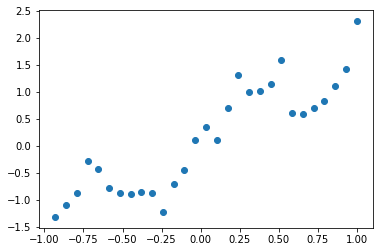

In [24]:
plt.scatter(X, Y)
plt.show()

In [25]:
# calculando coeficientes de regressão

numerator = 0
denominator = 0

for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2

b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

print(b1, b0)

1.5132826676616193 0.08956111478353079


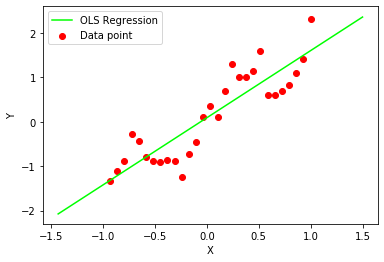

In [26]:
# plotando graficos

x_max = np.max(X) +0.5
x_min = np.min(X) -0.5

x = np.linspace(x_min, x_max, 2)
y = b0 + b1 * x

plt.plot(x, y, color = "#00ff00", label='OLS Regression')
plt.scatter(X, Y, color = "#ff0000", label = 'Data point')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [27]:
def root_mean_squared_error(Y):
    rmse = 0

    for i in range(n):
        y_pred = b0 + b1 * X[i]
        rmse += (Y[i] - y_pred) ** 2
        
    rmse = np.sqrt(rmse/n)
    return rmse
print(root_mean_squared_error(Y))

0.4557547135753803


In [28]:
def mean_squared_error(Y):
    mse = 0

    for i in range(n):
        y_pred = b0 + b1 * X[i]
        mse += (Y[i] - y_pred) ** 2
    
    mse = mse/n
    return mse
print(mean_squared_error(Y))

0.2077123589461769


## Item b) Gradient Descent

In [29]:
from __future__ import print_function, division
from builtins import range

In [40]:
N = 29
D = 2

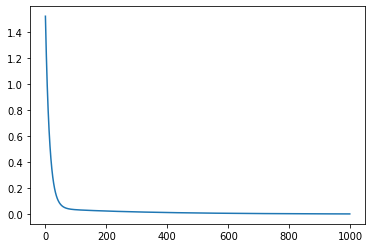

final w: x    0.151845
y    0.917241
dtype: float64
[-1.32698023 -1.10559772 -0.87394576 -0.28502695 -0.43115252 -0.79475402
 -0.88606806 -0.89989978 -0.86184365 -0.88805183 -1.23595129 -0.71956827
 -0.45202286  0.09889951  0.34896973  0.09747797  0.70019809  1.31051213
  1.00177576  1.00318231  1.14910129  1.59220607  0.60909009  0.59441623
  0.70300732  0.82332241  1.10646439  1.42295695  2.30983768]


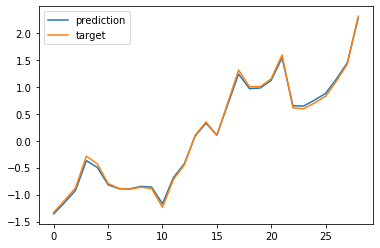

In [43]:
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D)# randomly initialize w

df_1.to_numpy()

learning_rate = 0.001
for t in range(1000):
  # update w
  Yhat = df_1.dot(w)
  delta = Yhat - Y
  w = w - learning_rate*df_1.T.dot(delta)

  # find and store the cost
  mse = delta.dot(delta) / N
  costs.append(mse)

# plot the costs
plt.plot(costs)
plt.show()

print("final w:", w)

print(Y)

# plot prediction vs target
plt.plot(Yhat, label='prediction')
plt.plot(Y, label='target')
plt.legend()
plt.show()

## Item c

### Stochastic Gradient Descent


Stochastic Gradient Descent works almost the same as Gradient Descent (also called Batch Gradient Descent), but instead of training on entire dataset, it picks only one sample to update m and b parameters, which makes it much faster. In the function below I made possible to change sample size (batch_size), because sometimes its better to use more than one sample at a time.

In [44]:
class LinearRegression(object):
    """Performs Linear Regression using Batch Gradient
    Descent."""
    def __init__(self, X, y, alpha=0.01, n_iterations=1000):
        """Initialise variables.
        
        Parameters
        ----------
        y : numpy array like, output / dependent variable
        X : numpy array like, input / independent variables
        alpha : float, int. Learning Rate
        n_iterations : Number of maximum iterations to perform
            gradient descent
        """
        self.y = y
        self.X = self._hstack_one(X)
        self.thetas = np.zeros((self.X.shape[1], 1))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print("Cost before fitting: {0:.2f}".format(self.cost()))

    @staticmethod
    def _hstack_one(input_matrix):
        """Horizontally stack a column of ones for the coefficients
        of the bias terms
        
        Parameters
        ----------
        input_matrix: numpy array like (N x M). Where N = number of 
            examples. M = Number of features.
        
        Returns
        -------
        numpy array with stacked column of ones (N x M + 1)
        """
        return np.hstack((np.ones((input_matrix.shape[0], 1)),
                              input_matrix))

    def cost(self, ):
        """Calculates the cost of current configuration"""
        return (1 / (2 * self.n_rows)) * np.sum(
            (self.X.dot(self.thetas) - self.y) ** 2)

    def predict(self, new_X):
        """Predict values using current configuration
        
        Parameters
        ----------
        new_X : numpy array like
        """
        
        new_X = self._hstack_one(new_X)
        return new_X.dot(self.thetas)

    def batch_gradient(self, ):
        h = self.X.dot(self.thetas) - self.y
        h = np.multiply(self.X, h)
        h = np.sum(h, axis=0)
        return h.reshape(-1, 1)

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print("Iteration: {0} Loss: {1:.5f}\r".format(i + 1, cost), end="")

In [46]:
X = df_1['x'].values.reshape(-1, 1)
y = df_1['y'].values.reshape(-1, 1)
lr = LinearRegression(X, y)
lr.batch_gradient_descent()

Cost before fitting: 0.50


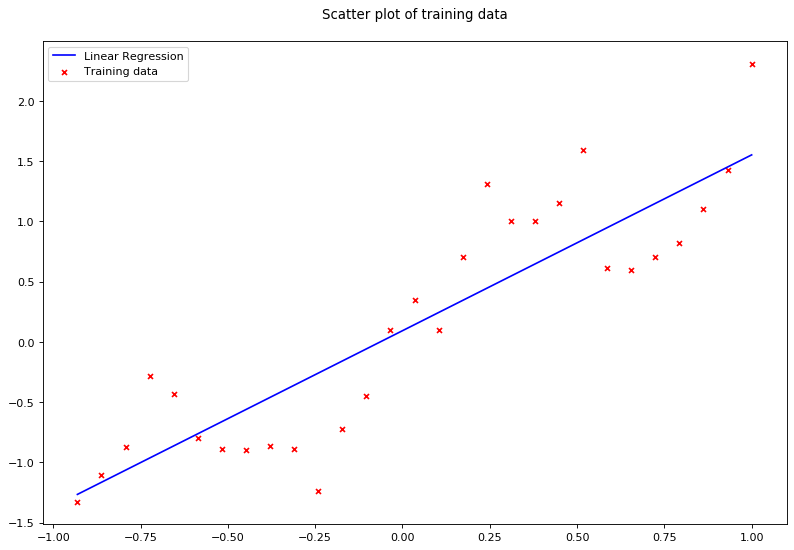

In [47]:
# plot regression line
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df_1['x'], df_1['y'], marker='x', color='red', s=20, label='Training data')
plt.plot(X, lr.predict(X), color='blue', label='Linear Regression')
plt.title("Scatter plot of training data\n")
plt.legend()
plt.show()

In [48]:
def cost(theta_0, theta_1):
    """Calculate the cost with given weights
    
    Parameters
    ----------
    theta_0 : numpy array like, weights dim 0
    theta_1 : numpy array like, weights dim 1
    
    Returns
    -------
    float, cost
    """
    
    X = df_1['x'].values
    y = df_1['y'].values
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    n_rows = X.shape[0]
    thetas = np.array([theta_0, theta_1]).reshape(-1, 1)
    return (1/(2*n_rows)) * sum((X.dot(thetas) - y)**2)[0]

def prepare_cost_matrix(theta0_matrix, theta1_matrix):
    """Prepares cost matrix for various weights to 
    create a 3D representation of cost. Every value
    in the cost matrix represents the cost for theta
    values in the theta matrices. 
    
    Parameters
    ----------
    theta0_matrix : numpy array like, weights dim 0
    theta1_matrix : numpy array like, weights dim 1
    """
    J_matrix = np.zeros(theta0_matrix.shape)
    row, col = theta0_matrix.shape 
    for x in range(row):
        for y in range(col):
            J_matrix[x][y] = cost(theta0_matrix[x][y], theta1_matrix[x][y])
    return J_matrix

theta_0 = np.arange(-5, 1, 0.01)
theta_1 = np.arange(0.6, 1.2, 0.001)
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
J_matrix = prepare_cost_matrix(theta_1, theta_0)

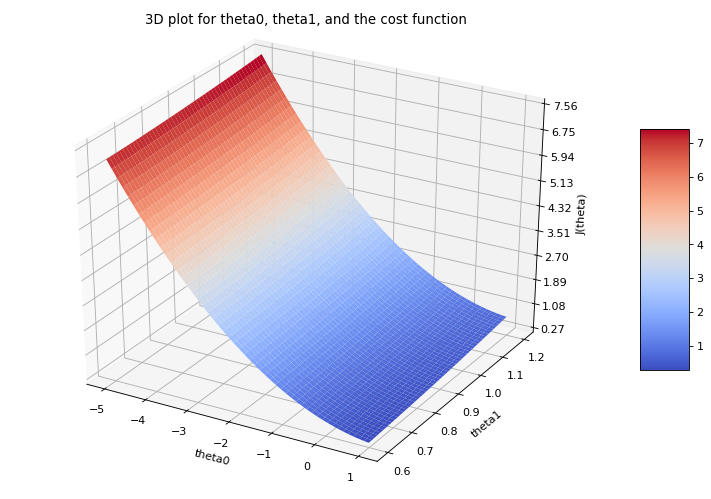

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, J_matrix, cmap=cm.coolwarm,)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("J(theta)")
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("3D plot for theta0, theta1, and the cost function\n")
plt.show()

# Questão 2

In [52]:
df_2 = pd.read_csv("boston.csv", names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B 1000', 'LSTAT', 'MEDV'],header=0)

In [53]:
df_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [54]:
from sklearn.model_selection import train_test_split

test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)